# Übung 7

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### 7.1 Zulassungskommission (Logistische Regression, Gradientenabstieg)
Eine Kommission an einer Hochschule hat in den vergangenen Jahren Bachelorabsolventen, die sich für einen Masterstudiengang bewarben, nach eingehender Prüfung zugelassen oder abgelehnt. Die Hochschulverwaltung überlegt, die durch die Kommissionsarbeit gebundenen Arbeitsressourcen freizusetzen und die Kommission von ihrer Arbeit zu entbinden. Die Wahrscheinlichkeit, mit der die Kommission die Zulassung zum Masterstudium für eine Bewerberin / einen Bewerber empfohlen hätte, soll mithilfe von Machine Learning und historischer Daten (nämlich dem Punkteergebnis von zwei Klausuren jedes Bewerbers sowie die damalige Entscheidung der Kommission) vorhergesagt werden.

**Daten:**

Die Daten enthalten die Punktzahlen zweier Abschlussklausuren (Feature 1 und Feature 2), die ein Bewerber / eine Bewerberin in ihrem Bachelorstudium erzielte, sowie die Entscheidung (Label) der Kommission, ob der Bewerber zum Masterstudium zugelassen wurde (+1) oder abgelehnt wurde (0). Und bevor Sie fragen: Dies ist ein ausgedachter Fall und kein Fall der FH Aachen.

**Ihre Aufgaben**

(1) Importieren Sie die Daten. Ich habe Ihnen in der ersten Spalte der Datenmatrix $X$ bereits Einsen eingetragen, damit Sie dies nicht mehr selbst implementieren müssen. Die Features (Feature 1 und 2) befinden sich in der zweiten und dritten Spalte der Matrix $X$. Das Label ($y$) habe ich Ihnen in der unteren Code-Zelle bereits so konvertiert, dass sie die Werte $-1$ bzw. $+1$ annimmt. Tragen Sie in einem Scatterplot Feature 1 gegen Feature 2 auf. Markieren Sie über Farbe oder Symbole, ob die Studienanwärter zum Masterstudium zugelassen wurden ($y=1$) oder nicht ($y=-1$).

In [172]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# Sie finden diese Daten auch zum Download unter: https://data.bialonski.de/ml/admission-data.txt
data = np.loadtxt('https://data.bialonski.de/ml/admission-data.txt', delimiter=',')

# Ihre Daten:
X_7_1, y_7_1 = np.insert(data[:, :2] / 100, 0, 1, 1), (data[:, 2] - .5) * 2

(2) Implementieren Sie eine Funktion `gradient`, die einen Gewichtsvektor, Features und Labels entgegennimmt und den Gradientenvektor der logistischen Regression zurückgibt. Schlagen Sie in den entsprechenden Folien der Vorlesung nach. Erinnern Sie sich daran, dass jeder Feature-Vektor drei Komponenten ($x_0$, $x_1$, $x_2$) hat, wobei $x_0=1$ und $x_1$ sowie $x_2$ der Wert des ersten bzw. zweiten Features ist.

In [173]:
def phi(x):
    return 1 / (1 + np.exp(-x))

def gradient(X, y, w):
    return np.sum([(-y[i]*x) * phi(-y[i] * w @ x) for i, x in enumerate(X)], axis=0) / X.shape[0]

(3) Implementieren Sie eine Funktion `E_in`, die einen Gewichtsvektor $\mathbf{w}$, die Featurevektoren $\mathbf{x}$ sowie die Labels $\mathbf{y}$ entgegennimmt und Ihnen den Fehler $E_\text{in}(\mathbf{w})$ der logistischen Regression zurückgibt.

In [174]:
def e_in(X, y, w):
    return np.sum([np.log(1 + np.exp(-y[i] * w @ x)) for i, x in enumerate(X)]) / X.shape[0]

(4) Implementieren Sie den "Gradientenabstieg mit fixierter Lernrate" (Funktion `grad_descent`), wie Sie ihn in der Vorlesung kennengelernt haben. Vergegenwärtigen Sie sich, dass beim Gradientenabstieg die Gewichtsvektoren verändert werden, nicht aber die Daten ($\mathbf{x}$ und $\mathbf{y}$ bleiben unverändert). Bauen Sie zusätzlich ein, dass bei jedem Iterationsschritt $t$ der Fehler $E_\text{in}(\mathbf{w}(t))$ berechnet wird und am Ende - neben dem finalen Gewichtsvektor - auch sämtliche über die Iterationen hinweg erzielten Fehler als Vektor herausgegeben wird.

In [196]:
def grad_descent(X, y, w=None, n=0.1, T=400, eps_e=10**-8, eps_g=10**-8):
    if w is None:
        w = np.random.normal(0, 1, X.shape[1])

    es = []
    for _ in range(T):
        g = gradient(X, y, w)
        v = -g / np.linalg.norm(g)

        w = w + n*v

        e = e_in(X, y, w)
        es.append(e)

        if e < eps_e: break
        if np.linalg.norm(g) < eps_g: break
    
    return w, es

(5) Entscheiden Sie sich dafür, wie sie den Anfangsgewichtsvektor $\mathbf{w}(0)$ initialisieren wollen. Sie können beispielsweise die Komponenten von $\mathbf{w}(0)$ aus einer Standardnormalverteilung mit kleiner Varianz ziehen. Oder Sie können einmal ausprobieren, $\mathbf{w}(0) = \mathbf{0}$ zu setzen.

(6) Entscheiden Sie sich für Terminationskriterien und eine Lernrate $\eta$ für den Gradientenabstieg. Ausgangspunkt könnte beispielsweise eine Lernrate von $\eta = 0.1$ und einer Termination bei 400 Iterationen sein. Sie können hier aber gerne experimentieren und herausfinden, ob Sie bessere Werte und Kriterien für das vorliegende Lernproblem finden.

(7) Führen Sie einen Gradientenabstieg durch und visualisieren Sie den Fehler $E_\text{in}(t)$ über die Iterationsschritte $t$ hinweg. 

0.21361007272245558


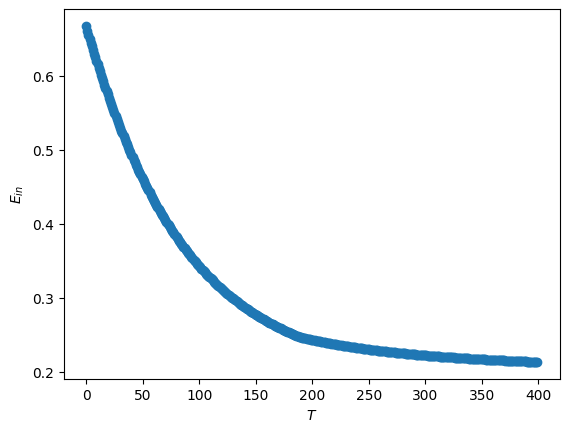

In [197]:
w, es = grad_descent(X_7_1, y_7_1)

print(np.min(es))

plt.scatter(range(len(es)), es)
plt.xlabel("$T$")
plt.ylabel("$E_{in}$")
plt.show()

(8) Nutzen Sie das finale Modell $g$ (spezifiziert durch den finalen Gewichtsvektor), um die Zulassungswahrscheinlichkeit $\left( g(\mathbf{x}) = \mathbb{P}[y=+1|\mathbf{x}] \right)$ für das Masterstudium eines Anwärters vorherzusagen, der folgende Ergebnisse in seinen zwei Abschlussklausuren erzielte: (Feature 1, Feature 2) = (0.45, 0.85). Schlagen Sie dazu in den Folien der Vorlesung nach, wie diese Wahrscheinlichkeit aus dem Gewichtsvektor und dem Featurevektor zu berechnen ist.

In [177]:
def h(x):
    return phi(w @ x)

h(np.array([1, 0.45, 0.85]))

0.691749615300848

(9) Visualisieren Sie die Zulassungswahrscheinlichkeit für die Featureebene, die durch Feature 1 und 2 aufgespannt wird: Legen Sie dazu ein Grid durch den Feature-Raum, wobei Sie jedes der beiden Feature von $0$ bis $1$ in $0.01$ er Schritten scannen, für jedes Wertepaar die Zulassungswahrscheinlichkeit berechnen, und im Anschluss daran visualisieren. `plt.imshow` kann Ihnen dabei helfen.

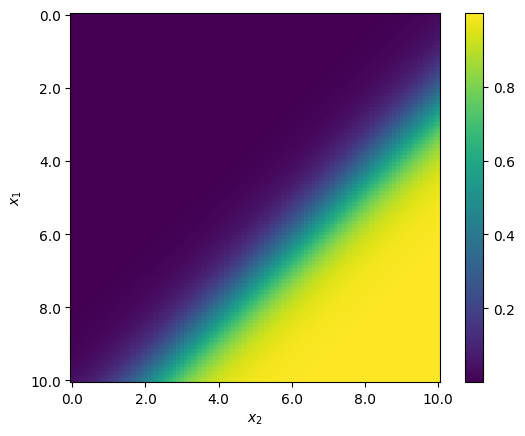

In [178]:
L = np.linspace(0, 1, 101)
plt.imshow([[h(np.array([1, x1, x2])) for x2 in L] for x1 in L])
plt.colorbar()
plt.xlabel("$x_2$")
plt.xticks(plt.xticks()[0][1:-1], plt.xticks()[0][1:-1] / 10)
plt.ylabel("$x_1$")
plt.yticks(plt.yticks()[0][1:-1], plt.yticks()[0][1:-1] / 10)
plt.show()